# EDA

### 1) Scanning and surface data cleaning

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/data/raw/medical_insurance_cost.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [189]:
df = df.drop_duplicates().reset_index(drop = True)
df.shape

(1337, 7)

### 2) Univariate analysis

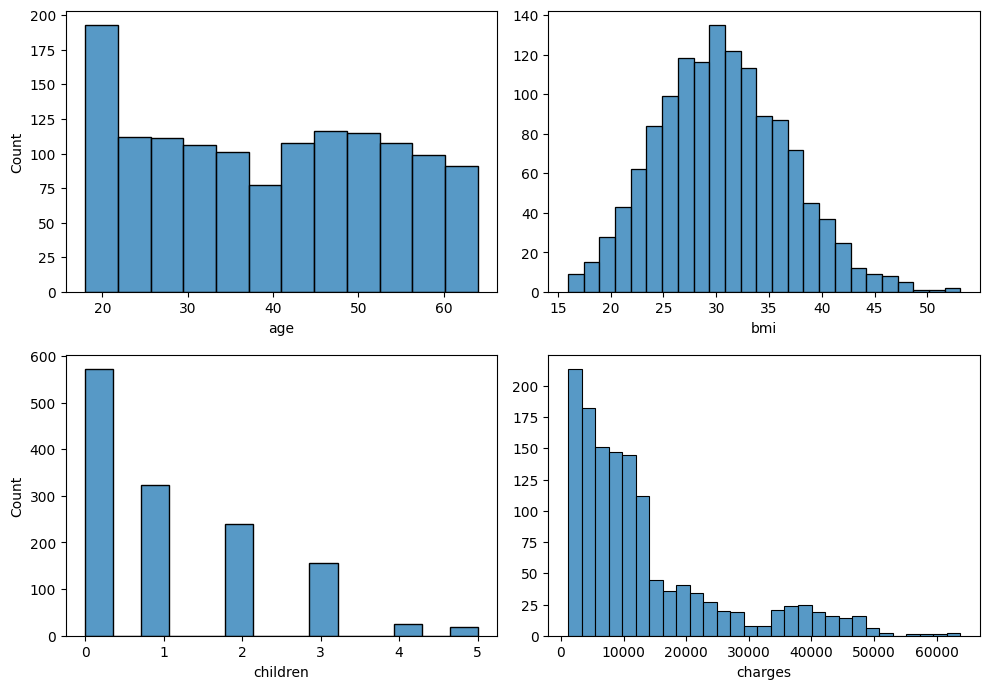

In [190]:
# Numeric variables

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "children")
sns.histplot(ax = axis[1, 1], data = df, x = "charges").set(ylabel = None)

plt.tight_layout()
plt.show()


* In the body mass index we have a symmetrical curve.

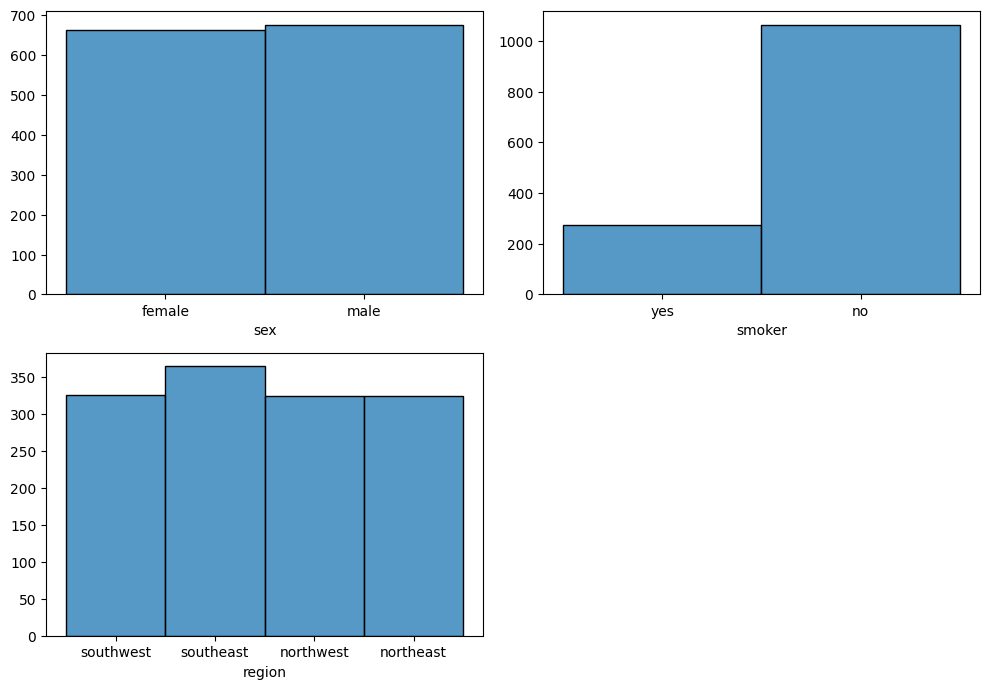

In [191]:
# Categorical variables

fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = df, x = "sex").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "smoker").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "region").set(ylabel = None)

fig.delaxes(axis[1, 1])

plt.tight_layout()
plt.show()

* We note that the majority of people are non-smokers.
* The number of women and men is similar, with slightly more men.
* Of the four regions, the southeast has the largest number of people.

### 3) Multivariate analysis

<Axes: xlabel='region', ylabel='count'>

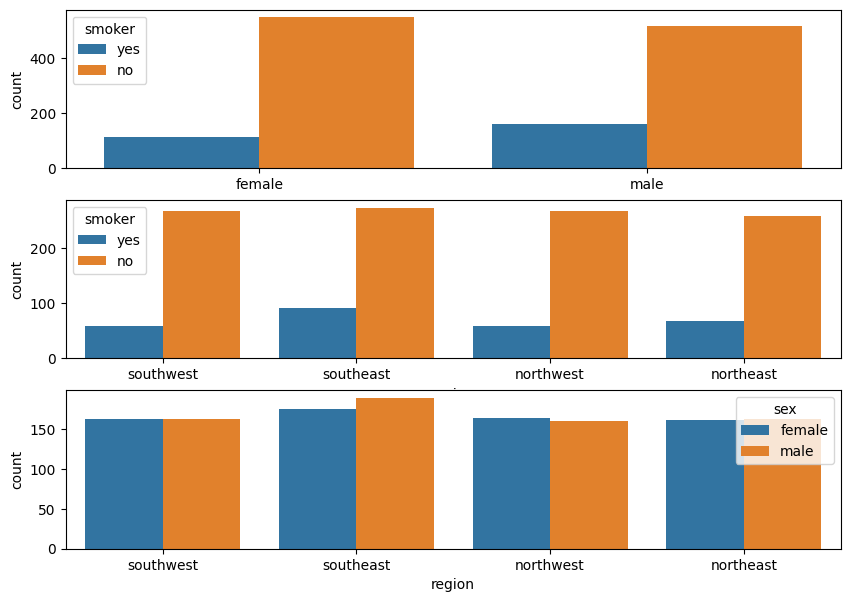

In [192]:
# Analysis C-C
fig, axis = plt.subplots(3, figsize = (10, 7))

sns.countplot(ax = axis[0], data = df, x = "sex", hue = "smoker")
sns.countplot(ax = axis[1], data = df, x = "region", hue = "smoker")
sns.countplot(ax = axis[2], data = df, x = "region", hue = "sex")

* More men smoke than women.
* The number of smokers and non-smokers is similar across regions.
* The number of women and men is similar in all regions.


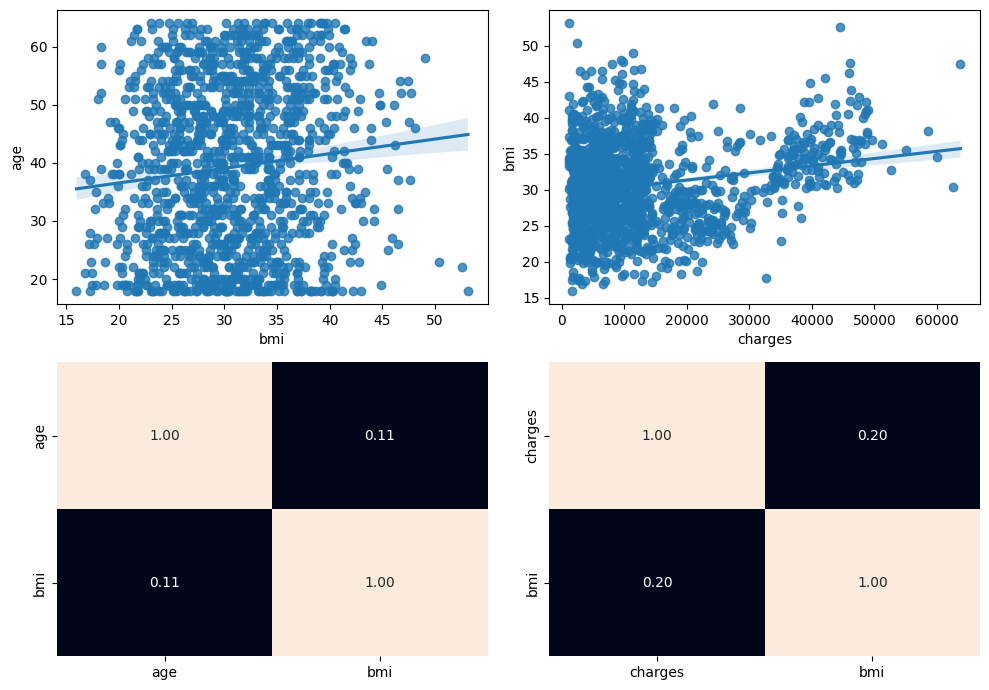

In [193]:
# Analysis N-N
fig, axis = plt.subplots(2, 2, figsize = (10, 7))


sns.regplot(ax = axis[0,0], data = df, x = "bmi", y = "age")
sns.heatmap(df[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1,0], cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "charges", y = "bmi")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

plt.tight_layout()
plt.show()

In [194]:
# We converted the categoricals to numericals in order to make the correlation map.
fac_col = ["sex", "smoker", "region"]

for col in fac_col:
    df[col] = pd.factorize(df[col])[0]

df.head()

# df["sex_n"] = pd.factorize(df["sex"])[0]
# df["smoker_n"] = pd.factorize(df["smoker"])[0]
# df["region_n"] = pd.factorize(df["region"])[0]

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


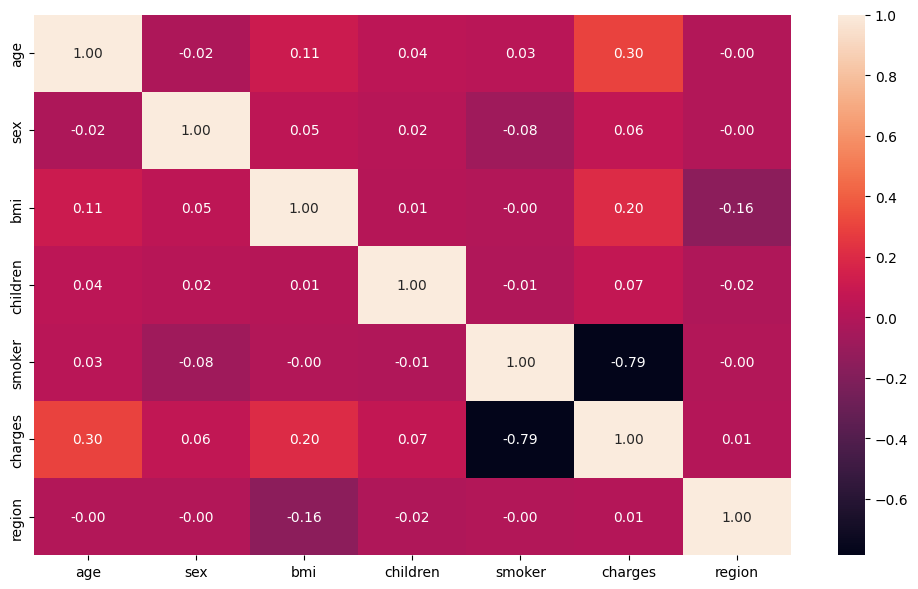

In [195]:
# Correlation map
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["age", "sex", "bmi", "children", "smoker", "charges", "region"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

* The most striking correlation is between the price of the insurance and whether the insured is a smoker or not. If he/she is a smoker, the price of the premium will rise as it is more likely that he/she will suffer from some kind of illness related to it.
* We can see how age and body mass index are related to the premium, although they do not have a high percentage.


### 3) Outlier analysis

In [196]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


1. `age`. Age of the primary beneficiary (numeric)
2. `sex`. Gender of the primary beneficiary (categorical)
3. `bmi`. Body mass index (numeric)
4. `children`. Number of children/dependents covered by the health insurance (numerical)
5. `smoker`. Smoker (categorical)
6. `region`. Residential area of the beneficiary in the USA: north-east, south-east, south-west, north-west (categorical)
7. `charges`. Health insurance premium (numerical)

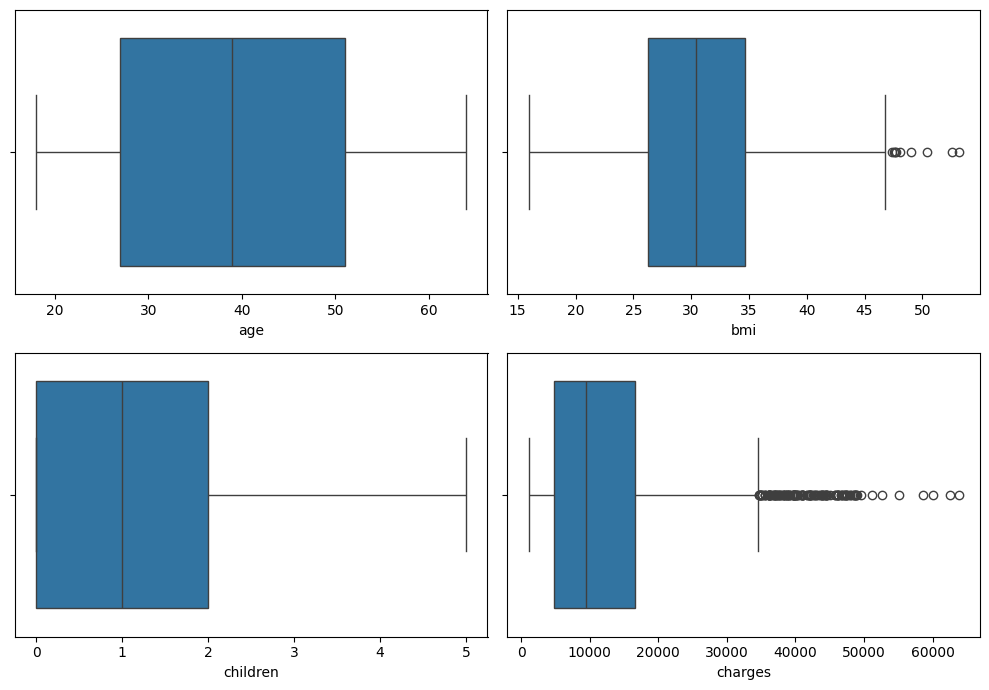

In [197]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.boxplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[0, 1], data = df, x = "bmi")
sns.boxplot(ax = axis[1, 0], data = df, x = "children")
sns.boxplot(ax = axis[1, 1], data = df, x = "charges")

plt.tight_layout()
plt.show()

In [198]:
# Análisis de valores faltantes
null = df.isnull().sum()
null

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 4) Split into Train and Test

In [199]:
from sklearn.model_selection import train_test_split

X = df.drop(["charges"], axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

X_train.head()

,age,sex,bmi,children,smoker,region
1330,23,0,33.40,0,1,0
327,45,1,36.48,2,0,2
188,41,0,32.20,1,1,0
650,53,0,39.60,1,1,1
1220,40,1,24.97,2,1,1


In [200]:
# Save WITHOUT SCALING

X_train.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/X_train.csv", index=False) # PREDICTORS OF TRAIN
with open ("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/y_train.txt", "w") as f: # TRAIN TARGET
    f.write(y_train.to_string(index=False))

X_test.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/X_test.csv", index=False)# # PREDICTORS OF TEST
with open ("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/y_test.txt", "w") as f:# TEST target
    f.write(y_test.to_string(index=False))

### 5) Scaling of variables

In [201]:
# MIN-MAX Scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_variables = ["age", "bmi", "children", "sex", "smoker", "region", "charges"]
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal.head()

,age,bmi,children,sex,smoker,region,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816


In [202]:
# Save WITH SCALING

X_train.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/scal_X_train.csv", index=False) 
with open ("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/scal_y_train.txt", "w") as f:
    f.write(y_train.to_string(index=False))

X_test.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/scal_X_test.csv", index=False)
with open ("/workspaces/linear-regression-project-tutorial-pilarzarco/data/processed/scal_y_test.txt", "w") as f:
    f.write(y_test.to_string(index=False))


In [203]:
# Save SCALER
from pickle import dump
dump(scaler, open ("/workspaces/linear-regression-project-tutorial-pilarzarco/models/scal_scaler.pk", "wb"))

### 6) Feature Selection

In [204]:
# Feature selection WITHOUT SCALING

from sklearn.feature_selection import f_classif, SelectKBest

X = df.drop("charges", axis = 1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=71)

# F-statistic method for feature selection
selection_model = SelectKBest(f_classif, k=4)
selection_model.fit(X_train, y_train)

ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

X_train_sel.head()


/home/codespace/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,bmi,children,smoker,region
0,44.770,1.0,1.0,1.0
1,23.465,2.0,1.0,3.0
2,24.530,0.0,1.0,1.0
3,35.530,0.0,0.0,1.0
4,35.310,1.0,1.0,1.0


In [205]:
X_test_sel.head()

,bmi,children,smoker,region
0,29.355,2.0,1.0,3.0
1,36.960,2.0,0.0,1.0
2,36.385,3.0,1.0,2.0
3,24.130,0.0,0.0,2.0
4,29.200,1.0,1.0,0.0


In [206]:
# Feature selection WITH SCALING


from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

X = df_scal.drop("charges", axis = 1)
y = df_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_scal_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_scal_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()


,bmi,children,smoker,region
0,44.770,1.0,1.0,1.0
1,23.465,2.0,1.0,3.0
2,24.530,0.0,1.0,1.0
3,35.530,0.0,0.0,1.0
4,35.310,1.0,1.0,1.0


In [207]:
X_test_scal_sel.head()

,age,bmi,children,smoker
0,0.673913,0.176352,0.0,1.0
1,0.239130,0.259349,0.8,1.0
2,0.717391,0.549502,0.6,1.0
3,0.282609,0.495830,0.6,0.0
4,0.282609,0.603444,0.4,1.0


In [208]:
# Add to training and test sets

X_train_scal_sel["charges"] = list(y_train)
X_test_scal_sel["charges"] = list(y_test)

In [209]:
# Saving the models

X_train_sel.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/models/model_train.csv", index = False)
X_test_sel.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/models/model_test.csv", index = False)

X_train_scal_sel.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/models/model_scal_train.csv", index = False)
X_test_scal_sel.to_csv("/workspaces/linear-regression-project-tutorial-pilarzarco/models/model_scal_test.csv", index = False)